In [ ]:
#pip install tensorflow-gpu
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
# Load the ViT models
import timm
import torch
vit_base_model = timm.create_model('vit_base_patch16_224', pretrained=True)
vit_small_model = timm.create_model('vit_small_patch16_224', pretrained=True)
vit_tiny_model = timm.create_model('vit_tiny_patch16_224', pretrained=True)

# Count the number of trainable parameters for each model
num_params_base = sum(p.numel() for p in vit_base_model.parameters() if p.requires_grad)
num_params_small = sum(p.numel() for p in vit_small_model.parameters() if p.requires_grad)
num_params_tiny = sum(p.numel() for p in vit_tiny_model.parameters() if p.requires_grad)

# Print the number of parameters for each model
print(f"Number of trainable parameters in ViT base model: {num_params_base}")
print(f"Number of trainable parameters in ViT small model: {num_params_small}")
print(f"Number of trainable parameters in ViT tiny model: {num_params_tiny}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/88.2M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

Number of trainable parameters in ViT base model: 86567656
Number of trainable parameters in ViT small model: 22050664
Number of trainable parameters in ViT tiny model: 5717416


In [ ]:
vit_tiny_model = timm.create_model('vit_tiny_patch16_224', pretrained=True)
num_params_tiny = sum(p.numel() for p in vit_tiny_model.parameters() if p.requires_grad)
print(f"Number of trainable parameters in ViT tiny model: {num_params_tiny}")

Number of trainable parameters in ViT tiny model: 5717416


In [ ]:
# Import necessary packages.
import numpy as np
from PIL import Image

import torch
import torch.nn as nn

from torch.utils.data import random_split
from torch.utils.data import DataLoader, Subset

import torchvision
from torchvision import datasets
from torchvision.datasets import DatasetFolder
import torchvision.transforms as transforms
import torchvision.models as models

# This is for the progress bar
from tqdm.auto import tqdm
#pip install keras tensorflow
# This is for ploting
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
import torch.optim as optim
import timm
from torchvision.models import resnet50

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Mar 27 15:42:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
import torch

if torch.cuda.is_available():
    print("CUDA is available and enabled.")
else:
    print("CUDA is not available or not properly configured.")

CUDA is available and enabled.


In [ ]:
# Install a package to download data from Kaggle
!pip install -q opendatasets

In [ ]:
import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/shuvoalok/raf-db-dataset/') # insert ypu kaggle username and key

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omari11234
Your Kaggle Key: ··········


100%|██████████| 37.7M/37.7M [00:01<00:00, 30.3MB/s]


In [ ]:
height, width = 224, 224

In [ ]:
data_transform = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(size=(height, width), scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
])

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [ ]:
test_dataset = datasets.ImageFolder(test_path, transform=test_transform)  #transform=None transform=test_transform

In [ ]:
batch_size=32

In [ ]:
train_path = "raf-db-dataset/DATASET/train"

In [ ]:
test_path = "raf-db-dataset/DATASET/test"

In [ ]:
#train_path = "raf-db-dataset/DATASET/train", transform=data_transform

In [ ]:
#train_generator = datagen.flow_from_directory(
    #train_path,
   # target_size=(224, 224),  # Adjust based on the input size expected by your model
   # batch_size=batch_size,
  #  class_mode='categorical')

In [ ]:
# Construct datasets.
train_dataset = datasets.ImageFolder(train_path, transform=data_transform )#transform=None as we are doing the augmentations ourselve transform=train_transform


# Define the desired ratio for train and evaluation data (e.g., 90% train, 10% evaluation)
train_ratio = 0.9
val_ratio = 1 - train_ratio

# Calculate the sizes of train and evaluation datasets based on the ratios
train_size = int(train_ratio * len(train_dataset))
val_size = len(train_dataset) - train_size

# Split the train dataset into train and evaluation subsets
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

print(f'Original train set has {len(train_dataset)} samples')
print(f'Train set has {len(train_subset)} samples')
print(f'Validation set has {len(val_subset)} samples')
print(f'Test set has {len(test_dataset)} samples')

Original train set has 12271 samples
Train set has 11043 samples
Validation set has 1228 samples
Test set has 3068 samples


In [ ]:
# Batch size for training, validation, and testing.
# A greater batch size usually gives a more stable gradient.
# But the GPU memory is limited, so please adjust it carefully.
#need to adjust batch size
#batch_size = 32

# Construct data loaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
valid_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

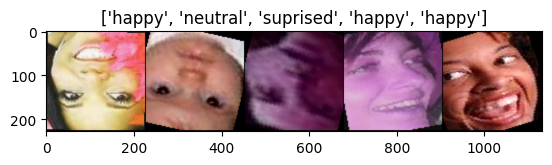

In [ ]:
# show some samples
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
train_loader_for_vis = DataLoader(train_subset, batch_size=5, shuffle=True, num_workers=0)
inputs, classes = next(iter(train_loader_for_vis))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

class_names = ['suprised', 'fearful', 'disgusted', 'happy', 'sad', 'angry', 'neutral']

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
import torch

if torch.cuda.is_available():
    print("CUDA is available and enabled.")
else:
    print("CUDA is not available or not properly configured.")

CUDA is available and enabled.


In [ ]:
num_classes = 7  # Replace with the desired number of classes

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
vit_model = timm.create_model('vit_tiny_patch16_224', pretrained=True)
vit_model.head = nn.Linear(vit_model.head.in_features, num_classes)

In [ ]:

vit_optimizer = torch.optim.Adam(vit_model.parameters(), lr=0.0003)


In [ ]:
num_classes = 7

In [ ]:
resnext_model = models.resnext50_32x4d(pretrained=True, progress=True)
resnext_model.fc = nn.Linear(resnext_model.fc.in_features, num_classes)
resnext_model.fc = resnext_model.fc.to(device)
resnextaoptimizer = torch.optim.Adam(resnext_model.parameters(), lr=0.0003)
resnextsgd_optimizer = torch.optim.SGD(resnext_model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
# Set the model to evaluation mode
#resnext_model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 120MB/s]


In [ ]:
hybrid_optimizer = optim.Adam(
    [
        {"params": resnext_model.parameters(), "lr": 0.0003},
        {"params": vit_model.parameters(), "lr": 0.0003},
    ]
)

In [ ]:
# Integration point: Combine ResNeXt and ViT features
class HybridModel(nn.Module):
    def __init__(self, resnext_model, vit_model):
        super(HybridModel, self).__init__()
        # Feature extractor (ResNeXt)
        self.resnext_features = nn.Sequential(*list(resnext_model.children())[:-2])

        # Vision Transformer (ViT)
        self.vit_features = vit_model

        # Final classification head
        self.fc = nn.Linear(resnext_model.fc.in_features + vit_model.head.in_features, num_classes)

    def forward(self, x):
        # Extract features from ResNeXt
        resnext_features = self.resnext_features(x)

        # Forward ViT features
        vit_features = self.vit_features(x)

        # Global average pooling for ResNeXt features
        resnext_features = resnext_features.mean([2, 3])

        # Concatenate ResNeXt and ViT features
        combined_features = torch.cat([resnext_features, vit_features], dim=1)

        # Final classification
        output = self.fc(combined_features)

        return output

# Instantiate the hybrid model
hybrid_model = HybridModel(resnext_model, vit_model)

In [ ]:
from joblib import Parallel, delayed
import torch
from tqdm import tqdm
import numpy as np

# Assuming hybrid_model, resnext_model, vit_model, criterion, hybrid_optimizer,
# train_loader, and valid_loader are already defined

# Move the hybrid model to the specified device
hybrid_model.to(device)

# The number of training epochs
n_epochs = 1

# Patience for early stopping
patience = 20

# Early stopping threshold
early_stopping_threshold = 1e-4

# Variables to record information
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

# Early stopping counter
early_stopping_counter = 0

# Define a function to execute training and validation for one epoch
def run_epoch(train_loader, valid_loader):
    # Training
    hybrid_model.train()
    train_loss = []
    train_accs = []
    for batch in tqdm(train_loader, desc='Training'):
        hybrid_optimizer.zero_grad()
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        resnext_logits = resnext_model(imgs)
        vit_logits = vit_model(imgs)
        loss = criterion(resnext_logits, labels) + criterion(vit_logits, labels)
        loss.backward()
        hybrid_optimizer.step()
        acc = ((resnext_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # Validation
    hybrid_model.eval()
    valid_loss = []
    valid_accs = []
    with torch.no_grad():
        for batch in tqdm(valid_loader, desc='Validation'):
            imgs, labels = batch
            imgs = imgs.to(device)
            labels = labels.to(device)
            logits = resnext_model(imgs)
            vit_logits = vit_model(imgs)
            loss = criterion(resnext_logits, labels) + criterion(vit_logits, labels)
            acc = ((logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean().float().mean()
            valid_loss.append(loss.item())
            valid_accs.append(acc.item())
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(hybrid_model.state_dict(), 'best_model.pth')
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    # Print training and validation metrics
    print(f"Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

    return valid_acc

# Define the number of CPU cores to use (-1 means using all available cores)
num_cores = -1

# Run training and validation for each epoch using parallel processing
results = Parallel(n_jobs=num_cores)(
    delayed(run_epoch)(train_loader, valid_loader) for _ in range(n_epochs)
)

KeyboardInterrupt: 

In [ ]:
from joblib import Parallel, delayed
import torch
from tqdm import tqdm
import numpy as np

# Assuming densevit, densenet_model, vit_model, criterion, hybrid_optimizer1,
# train_loader, and valid_loader are already defined

# Move the hybrid model to the specified device
densevit.to(device)

# The number of training epochs
n_epochs = 50

# Patience for early stopping
patience = 20

# Early stopping threshold
early_stopping_threshold = 1e-4

# Variables to record information
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

# Early stopping counter
early_stopping_counter = 0

# Define a function to execute training and validation for one epoch
def run_epoch(train_loader, valid_loader):
    # Training loop
    densevit.train()
    train_loss = []
    train_accs = []
    for batch in tqdm(train_loader):
        hybrid_optimizer1.zero_grad()
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        densenet_logits = densenet_model(imgs)
        vit_logits = vit_model(imgs)
        loss = criterion(densenet_logits, labels) + criterion(vit_logits, labels)
        loss.backward()
        hybrid_optimizer1.step()
        acc = ((densenet_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # Validation loop
    densevit.eval()
    valid_loss = []
    valid_accs = []
    for batch in tqdm(valid_loader):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            densenet_logits = densenet_model(imgs)
            vit_logits = vit_model(imgs)
        loss = criterion(densenet_logits, labels) + criterion(vit_logits, labels)
        acc = ((densenet_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(densevit.state_dict(), 'best_model.pth')

    # Print the information.
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

    return valid_acc

# Define the number of CPU cores to use (-1 means using all available cores)
num_cores = -1

# Run training and validation for each epoch using parallel processing
results = Parallel(n_jobs=num_cores)(
    delayed(run_epoch)(train_loader, valid_loader) for epoch in tqdm(range(n_epochs))
)

In [ ]:
from joblib import Parallel, delayed
import torch
from tqdm import tqdm
import numpy as np

# Assuming hybrid_model, resnext_model, vit_model, criterion, hybrid_optimizer,
# train_loader, and valid_loader are already defined

# Move the hybrid model to the specified device
hybrid_model.to(device)

# The number of training epochs
n_epochs = 50

# Patience for early stopping
patience = 20

# Early stopping threshold
early_stopping_threshold = 1e-4

# Variables to record information
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

# Early stopping counter
early_stopping_counter = 0

# Define a function to execute training and validation for one epoch
def run_epoch(train_loader, valid_loader):
    # Training
    hybrid_model.train()
    train_loss = []
    train_accs = []
    for batch in tqdm(train_loader, desc='Training'):
        hybrid_optimizer.zero_grad()
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        resnext_logits = resnext_model(imgs)
        vit_logits = vit_model(imgs)
        loss = criterion(resnext_logits, labels) + criterion(vit_logits, labels)
        loss.backward()
        hybrid_optimizer.step()
        acc = ((resnext_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # Validation
    hybrid_model.eval()
    valid_loss = []
    valid_accs = []
    with torch.no_grad():
        for batch in tqdm(valid_loader, desc='Validation'):
            imgs, labels = batch
            imgs = imgs.to(device)
            labels = labels.to(device)
            logits = resnext_model(imgs)
            vit_logits = vit_model(imgs)
            loss = criterion(resnext_logits, labels) + criterion(vit_logits, labels)
            acc = ((logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean().float().mean()
            valid_loss.append(loss.item())
            valid_accs.append(acc.item())
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(hybrid_model.state_dict(), 'best_model.pth')
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    # Print training and validation metrics
    print(f"Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

    return valid_acc

# Define the number of CPU cores to use (-1 means using all available cores)
num_cores = -1

# Run training and validation for each epoch using parallel processing
results = Parallel(n_jobs=num_cores)(
    delayed(run_epoch)(train_loader, valid_loader) for _ in range(n_epochs)
)


In [ ]:
hybrid_model.to(device)  # Move the model to the specified device
# The number of training epochs.
n_epochs = 50

patience = 20  # Number of epochs with no improvement after which training will be stopped
early_stopping_counter = 0
early_stopping_threshold = 1e-4

# These are used to record information
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):

    # ---------- Training ----------
    # Make sure the model is in train mode before training.
    hybrid_model.train()

    # These are used to record information in training.
    train_loss = []
    train_accs = []

    # Iterate the training set by batches.
    for batch in tqdm(train_loader):
        # Gradients stored in the parameters in the previous step should be cleared out first.
        hybrid_optimizer.zero_grad()

        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward the data. (Make sure data and model are on the same device.)
        resnext_logits = resnext_model(imgs)
        vit_logits = vit_model(imgs)

        # Calculate the cross-entropy loss.
        # We don't need to apply softmax before computing cross-entropy as it is done automatically.
        loss = criterion(resnext_logits, labels) + criterion(vit_logits, labels)

        # Compute the gradients for parameters.
        loss.backward()

        # Update the parameters with computed gradients.
        hybrid_optimizer.step()

        # Compute the accuracy for the current batch.
        acc = ((resnext_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()

        # Record the loss and accuracy.
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # The average loss and accuracy of the training set are the averages of the recorded values.
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # ---------- Validation ----------
    # Make sure the model is in eval mode so that some modules like dropout are disabled and work normally.
    hybrid_model.eval()

    # These are used to record information in validation.
    valid_loss = []
    valid_accs = []

    # Iterate the validation set by batches.
    for batch in tqdm(valid_loader):
        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # We don't need gradient in validation.
        # Using torch.no_grad() accelerates the forward process.
        with torch.no_grad():
            logits = resnext_model(imgs)
            vit_logits = vit_model(imgs)

        # We can still compute the loss (but not the gradient).
        loss = criterion(resnext_logits, labels) + criterion(vit_logits, labels)

        # Compute the accuracy for the current batch.
        acc = ((logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean().float().mean()

        # Record the loss and accuracy.
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # The average loss and accuracy for the entire validation set are the averages of the recorded values.
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(hybrid_model.state_dict(), 'best_model.pth')

    # Print the information.
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")
    #If your criterion is an instance of torch.nn.CrossEntropyLoss which it is, it automatically applies softmax to the logits before calculating the cross-entropy loss. Therefore, you don't need to add a separate softmax layer in your model.

In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# load best model weights
#hybrid_model.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
#hybrid_model.eval()

#test_accs = []

# Iterate the testing set by batches.
#for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
   # imgs, labels = batch
   # imgs = imgs.to(device)
   # labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    #with torch.no_grad():
      #logits = model(imgs)

    # We can still compute the loss (but not the gradient).
   # loss = criterion(logits, labels)

    # Compute the accuracy for current batch.
   # acc = (logits.argmax(dim=-1) == labels).float().mean()

    # Record accuracy.
    #test_accs.append(acc)

# The average accuracy for entire test set is the average of the recorded values.
#test_acc = sum(test_accs) / len(test_accs)
#print(f'Test accuracy {test_acc}')

In [ ]:
densenet_model = models.densenet121(pretrained=True, progress=True)

# Count the total number of parameters
total_params = sum(p.numel() for p in densenet_model.parameters())
print("Total number of parameters in DenseNet-121 model:", total_params)

In [ ]:
densenet_model = models.densenet121(pretrained=True, progress=True)
densenet_model.classifier = nn.Linear(densenet_model.classifier.in_features, num_classes)
densenet_model.classifier = densenet_model.classifier.to(device)
densenetaoptimizer = torch.optim.Adam(densenet_model.parameters(), lr=0.0003)
densenetsgd_optimizer = torch.optim.SGD(densenet_model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
# Set the model to evaluation mode
#densenet_model.eval()

In [ ]:
hybrid_optimizer1 = optim.Adam(
    [
        {"params": densenet_model.parameters(), "lr": 0.0003},
        {"params": vit_model.parameters(), "lr": 0.0003},
    ]
)

In [ ]:
# Integration point: Combine DenseNet and ViT features
class DenseVit(nn.Module):
    def __init__(self, densenet_model, vit_model):
        super(DenseVit, self).__init__()
        # Feature extractor (DenseNet)
        self.densenet_features = nn.Sequential(*list(densenet_model.children())[:-1])

        # Vision Transformer (ViT)
        self.vit_features = vit_model

        # Final classification head
        self.fc = nn.Linear(densenet_model.classifier.in_features + vit_model.head.in_features, num_classes)

    def forward(self, x):
        # Extract features from DenseNet
        densenet_features = self.densenet_features(x)
        densenet_features = torch.flatten(densenet_features, 1)

        # Forward ViT features
        vit_features = self.vit_features(x)

        # Concatenate DenseNet and ViT features
        combined_features = torch.cat([densenet_features, vit_features], dim=1)

        # Final classification
        output = self.fc(combined_features)

        return output
        # Instantiate the hybrid model
densevit = DenseVit(densenet_model, vit_model)
densevit.to(device)  # Move the model to the specified device

In [ ]:
# The number of training epochs.
n_epochs = 20

patience = 20  # Number of epochs with no improvement after which training will be stopped
early_stopping_counter = 0
early_stopping_threshold = 1e-4

# These are used to record information
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):
    # Training loop
    densevit.train()

    train_loss = []
    train_accs = []

    for batch in tqdm(train_loader):
        hybrid_optimizer1.zero_grad()

        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward the data. (Make sure data and model are on the same device.)


        densenet_logits = densenet_model(imgs)
        vit_logits = vit_model(imgs) #this is different as not included in other
        loss = criterion(densenet_logits, labels) + criterion(vit_logits, labels)
        loss.backward()
        hybrid_optimizer1.step()
        acc = ((densenet_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean() #ask chatgpt if accuracy and loss being determined like that is accurate
        train_loss.append(loss.item())
        train_accs.append(acc.item())
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # Validation loop
    densevit.eval()
    valid_loss = []
    valid_accs = []
    for batch in tqdm(valid_loader):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            densenet_logits = densenet_model(imgs)
            vit_logits = vit_model(imgs)#again same thing
        loss = criterion(densenet_logits, labels) + criterion(vit_logits, labels)
        acc = ((densenet_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(densevit.state_dict(), 'best_model.pth')

    # Print the information.
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Load pre-trained VGG19 model
vgg19_model = models.vgg19(pretrained=True, progress=True).to(device) #may need to adjust model parameters for specific dataset ie num classes
vgg19_model.classifier[-1] = nn.Linear(vgg19_model.classifier[-1].in_features, num_classes)
vgg19_model.classifier[-1] = vgg19_model.classifier[-1].to(device)
vggaoptimizer = torch.optim.Adam(vgg19_model.parameters(), lr=0.0003)
vggsgd_optimizer = torch.optim.SGD(vgg19_model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4) #we want the same thin

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:05<00:00, 101MB/s]


In [ ]:
hybrid_optimizer2 = optim.Adam(
    [
        {"params": vgg19_model.parameters(), "lr": 0.0003},
        {"params": vit_model.parameters(), "lr": 0.0003},
    ]
)

In [ ]:
class Vgg19Vit(nn.Module):
    def __init__(self, vgg19_model, vit_model):
        super(Vgg19Vit, self).__init__()
        # Feature extractor (VGG19)
        self.vgg19_features = nn.Sequential(*list(vgg19_model.children())[:-2])

        # Vision Transformer (ViT)
        self.vit_features = vit_model

        # Final classification head
        self.fc = nn.Linear(vgg19_model.classifier[-1].in_features + vit_model.head.in_features, num_classes)

    def forward(self, x):
        # Extract features from VGG19
        vgg19_features = self.vgg19_features(x)

        # Forward ViT features
        vit_features = self.vit_features(x)

        # Global average pooling for VGG19 features
        vgg19_features = vgg19_features.mean([2, 3])

        # Concatenate VGG19 and ViT features
        combined_features = torch.cat([vgg19_features, vit_features], dim=1)

        # Final classification
        output = self.fc(combined_features)

        return output

# Instantiate the hybrid model
vgg19vit = Vgg19Vit(vgg19_model, vit_model)
vgg19vit.to(device)  # Move the model to the specified device

Vgg19Vit(
  (vgg19_features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
  

In [ ]:
# The number of training epochs.
n_epochs = 20

patience = 20  # Number of epochs with no improvement after which training will be stopped
early_stopping_counter = 0
early_stopping_threshold = 1e-4

# These are used to record information
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):
  # Training loop
    vgg19vit.train()
    train_loss = []
    train_accs = []
    for batch in tqdm(train_loader):
        hybrid_optimizer2.zero_grad()

        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        vgg19_logits = vgg19_model(imgs)
        vit_logits = vit_model(imgs)
        loss = criterion(vgg19_logits, labels) + criterion(vit_logits, labels)
        loss.backward()
        hybrid_optimizer2.step()
        acc = ((vgg19_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # Validation loop
    vgg19vit.eval()
    valid_loss = []
    valid_accs = []
    for batch in tqdm(valid_loader):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            vgg19_logits = vgg19_model(imgs)
            vit_logits = vit_model(imgs)
        loss = criterion(vgg19_logits, labels) + criterion(vit_logits, labels)
        acc = ((vgg19_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(vgg19vit.state_dict(), 'best_model.pth')

    # Print the information.
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

100%|██████████| 39/39 [00:17<00:00,  2.24it/s]


[Epoch: 001/020] Train: loss=3.26786, acc=0.30446 | Valid: loss=3.11331, acc=0.30716


100%|██████████| 39/39 [00:17<00:00,  2.21it/s]


[Epoch: 002/020] Train: loss=2.85102, acc=0.30985 | Valid: loss=2.78645, acc=0.27885


100%|██████████| 39/39 [00:17<00:00,  2.23it/s]


[Epoch: 003/020] Train: loss=2.68560, acc=0.32009 | Valid: loss=2.76216, acc=0.30048


100%|██████████| 39/39 [00:17<00:00,  2.26it/s]


[Epoch: 004/020] Train: loss=2.58859, acc=0.32939 | Valid: loss=2.57010, acc=0.32372


100%|██████████| 39/39 [00:17<00:00,  2.26it/s]


[Epoch: 005/020] Train: loss=2.53606, acc=0.33300 | Valid: loss=2.49296, acc=0.36645


100%|██████████| 39/39 [00:16<00:00,  2.29it/s]


[Epoch: 006/020] Train: loss=2.47900, acc=0.34014 | Valid: loss=2.55925, acc=0.36886


100%|██████████| 39/39 [00:16<00:00,  2.31it/s]


[Epoch: 007/020] Train: loss=2.43925, acc=0.33966 | Valid: loss=2.42544, acc=0.35710


100%|██████████| 39/39 [00:16<00:00,  2.32it/s]


[Epoch: 008/020] Train: loss=2.41543, acc=0.33932 | Valid: loss=2.49860, acc=0.37126


100%|██████████| 39/39 [00:16<00:00,  2.34it/s]


[Epoch: 009/020] Train: loss=2.40351, acc=0.34240 | Valid: loss=2.51231, acc=0.28873


100%|██████████| 39/39 [00:16<00:00,  2.30it/s]


[Epoch: 010/020] Train: loss=2.35950, acc=0.34471 | Valid: loss=2.39243, acc=0.35096


100%|██████████| 39/39 [00:17<00:00,  2.27it/s]


[Epoch: 011/020] Train: loss=2.32136, acc=0.34854 | Valid: loss=2.35553, acc=0.34509


100%|██████████| 39/39 [00:17<00:00,  2.25it/s]


[Epoch: 012/020] Train: loss=2.32974, acc=0.34565 | Valid: loss=2.33411, acc=0.35524


100%|██████████| 39/39 [00:17<00:00,  2.25it/s]


[Epoch: 013/020] Train: loss=2.29642, acc=0.34908 | Valid: loss=2.39823, acc=0.33226


100%|██████████| 39/39 [00:17<00:00,  2.26it/s]


[Epoch: 014/020] Train: loss=2.28116, acc=0.34736 | Valid: loss=2.42900, acc=0.34882


100%|██████████| 39/39 [00:16<00:00,  2.31it/s]


[Epoch: 015/020] Train: loss=2.27719, acc=0.34754 | Valid: loss=2.34582, acc=0.33280


100%|██████████| 39/39 [00:17<00:00,  2.27it/s]


[Epoch: 016/020] Train: loss=2.25149, acc=0.34932 | Valid: loss=2.36808, acc=0.35443


100%|██████████| 39/39 [00:17<00:00,  2.23it/s]


[Epoch: 017/020] Train: loss=2.24135, acc=0.35215 | Valid: loss=2.37263, acc=0.32051


100%|██████████| 39/39 [00:20<00:00,  1.94it/s]


[Epoch: 018/020] Train: loss=2.22676, acc=0.35170 | Valid: loss=2.32499, acc=0.33120


100%|██████████| 39/39 [00:20<00:00,  1.88it/s]


[Epoch: 019/020] Train: loss=2.20894, acc=0.35290 | Valid: loss=2.37103, acc=0.33761


100%|██████████| 39/39 [00:20<00:00,  1.91it/s]

[Epoch: 020/020] Train: loss=2.19727, acc=0.35540 | Valid: loss=2.35414, acc=0.34348


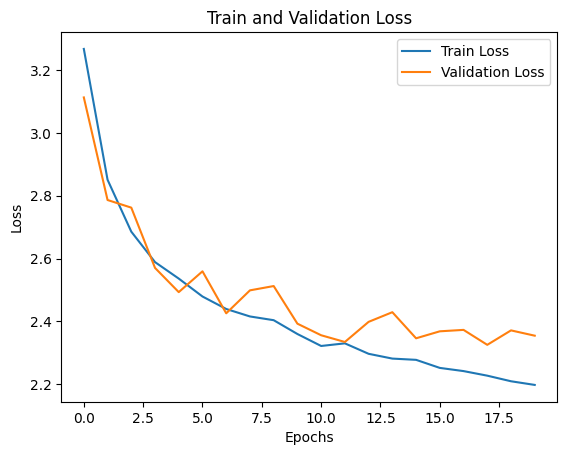

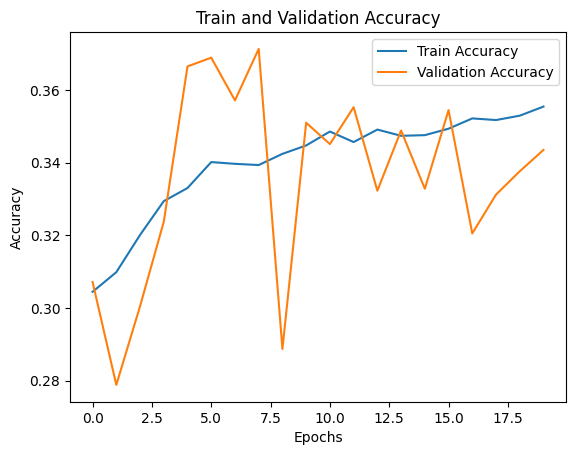

In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
vgg19_logits = vgg19_model(imgs)
        vit_logits = vit_model(imgs)
        loss = criterion(vgg19_logits, labels) + criterion(vit_logits, labels)

        acc = ((vgg19_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

In [ ]:
# load best model weights
vgg19vit.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
vgg19vit.eval()

test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
      vgg19_logits = vgg19_model(imgs)
      vit_logits = vit_model(imgs)
      loss = criterion(vgg19_logits, labels) + criterion(vit_logits, labels)

      acc = ((vgg19_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()

    # We can still compute the loss (but not the gradient).
    #loss = criterion(logits, labels)

    # Compute the accuracy for current batch.
   # acc = (logits.argmax(dim=-1) == labels).float().mean()

    # Record accuracy.
    test_accs.append(acc)

# The average accuracy for entire test set is the average of the recorded values.
test_acc = sum(test_accs) / len(test_accs)
print(f'Test accuracy {test_acc}')

100%|██████████| 96/96 [00:23<00:00,  4.08it/s]

Test accuracy 0.357421875


In [ ]:
hrnet_model = timm.create_model('hrnet_w18_small', pretrained=True).to(device)
# Number of input features for the classifier layer
in1_features = hrnet_model.num_features
hrnet_model.fc = nn.Linear(in1_features, num_classes)
hrnet_model.fc = hrnet_model.fc.to(device)
hrnet_optimizer = optim.Adam(hrnet_model.parameters(), lr=0.0003)
hrnet_sgd_optimizer = optim.SGD(hrnet_model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

In [ ]:
hybrid_optimizer3 = optim.Adam(
    [
        {"params": hrnet_model.parameters(), "lr": 0.0003},
        {"params": vit_model.parameters(), "lr": 0.0003},
    ]
)

In [ ]:
class HrnetVit(nn.Module):
    def __init__(self, hrnet_model, vit_model):
        super(HrnetVit, self).__init__()
        # Feature extractor (HRNet)
        self.hrnet_features = hrnet_model

        # Vision Transformer (ViT)
        self.vit_features = vit_model

        # Final classification head
        self.fc = nn.Linear(hrnet_model.fc.in_features + vit_model.head.in_features, num_classes)

    def forward(self, x):
        # Extract features from HRNet
        hrnet_features = self.hrnet_features(x)

        # Forward ViT features
        vit_features = self.vit_features(x)

        # Concatenate HRNet and ViT features
        combined_features = torch.cat([hrnet_features, vit_features], dim=1)

        # Final classification
        output = self.fc(combined_features)

        return output

# Instantiate the hybrid model
hrnetvit_model = HrnetVit(hrnet_model, vit_model)

# Move the model to the specified device
hrnetvit_model.to(device)

In [ ]:
n_epochs = 30

patience = 20  # Number of epochs with no improvement after which training will be stopped
early_stopping_counter = 0
early_stopping_threshold = 1e-4

# These are used to record information
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):
    # Training loop
    hrnetvit_model.train()
    train_loss = []
    train_accs = []
    for batch in tqdm(train_loader):
        hybrid_optimizer3.zero_grad()

        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward pass
        hrnet_logits = hrnet_model(imgs)
        vit_logits = vit_model(imgs)

        # Compute the loss
        loss = criterion(hrnet_logits, labels) + criterion(vit_logits, labels)

        # Backward pass and optimization step
        loss.backward()
        hybrid_optimizer3.step()

        # Compute accuracy
        acc = ((hrnet_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # Compute the average training loss and accuracy for this epoch
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # Validation loop
    hrnetvit_model.eval()
    valid_loss = []
    valid_accs = []
    for batch in tqdm(valid_loader):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward pass (no gradient calculation needed)
        with torch.no_grad():
            hrnet_logits = hrnet_model(imgs)
            vit_logits = vit_model(imgs)

        # Compute the loss
        loss = criterion(hrnet_logits, labels) + criterion(vit_logits, labels)

        # Compute accuracy
        acc = ((hrnet_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # Compute the average validation loss and accuracy for this epoch
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Save the best model based on validation accuracy
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(hrnetvit_model.state_dict(), 'best_model.pth')



    # Print the information for this epoch
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# load best model weights

hrnetvit_model.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
hrnetvit_model.eval()

test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
        hrnet_logits = hrnetvit_model(imgs)
        vit_logits = vit_model(imgs)

        # Compute the loss
        loss = criterion(hrnet_logits, labels) + criterion(vit_logits, labels)

        # Compute the accuracy for current batch.
        acc = ((hrnet_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()

    # Record accuracy.
    test_accs.append(acc)

# The average accuracy for entire test set is the average of the recorded values.
test_acc = sum(test_accs) / len(test_accs)
print(f'Test accuracy {test_acc}')

In [ ]:
vit_optimizer = torch.optim.Adam(vit_model.parameters(), lr=0.0003)

In [ ]:
vit_model.to(device)  # Move the Vision Transformer model to the specified device
# The number of training epochs.
n_epochs = 30

# These are used to record information
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):

    # ---------- Training ----------
    # Make sure the model is in train mode before training.
    vit_model.train()

    # These are used to record information in training.
    train_loss = []
    train_accs = []

    # Iterate the training set by batches.
    for batch in tqdm(train_loader):
        # Gradients stored in the parameters in the previous step should be cleared out first.
        vit_optimizer.zero_grad()

        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward the data. (Make sure data and model are on the same device.)
        logits = vit_model(imgs)

        # Calculate the cross-entropy loss.
        # We don't need to apply softmax before computing cross-entropy as it is done automatically.
        loss = criterion(logits, labels)

        # Compute the gradients for parameters.
        loss.backward()

        # Update the parameters with computed gradients.
        vit_optimizer.step()

        # Compute the accuracy for the current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # The average loss and accuracy of the training set are the averages of the recorded values.
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # ---------- Validation ----------
    # Make sure the model is in eval mode so that some modules like dropout are disabled and work normally.
    vit_model.eval()

    # These are used to record information in validation.
    valid_loss = []
    valid_accs = []

    # Iterate the validation set by batches.
    for batch in tqdm(valid_loader):
        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # We don't need gradient in validation.
        # Using torch.no_grad() accelerates the forward process.
        with torch.no_grad():
            logits = vit_model(imgs)

        # We can still compute the loss (but not the gradient).
        loss = criterion(logits, labels)

        # Compute the accuracy for the current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # The average loss and accuracy for the entire validation set are the averages of the recorded values.
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(vit_model.state_dict(), 'best_model_vit.pth')
        early_stopping_counter = 0  # Reset the counter when there's improvement
    else:
        # No improvement in validation accuracy
        early_stopping_counter += 1

    if early_stopping_counter >= patience:
        print(f"Early stopping after {epoch + 1} epochs with no improvement.")
        break

    # Print the information.
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# load best model weights

vit_model.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
vit_model.eval()

test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
        vit_logits = vit_model(imgs)

        # Compute the loss
        loss = criterion(vit_logits, labels)

        # Compute the accuracy for current batch.
        acc = (vit_logits.argmax(dim=-1) == labels)).float().mean()

    # Record accuracy.
    test_accs.append(acc)

# The average accuracy for entire test set is the average of the recorded values.
test_acc = sum(test_accs) / len(test_accs)
print(f'Test accuracy {test_acc}')

In [ ]:
#need to define resnext optimizer

In [ ]:
#resnextaoptimizer

In [ ]:
resnext_model.to(device)  # Move the model to the specified device
# The number of training epochs.
n_epochs = 30

# These are used to record information
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):
    resnext_model.train()
    train_loss = []
    train_accs = []
    for batch in tqdm(train_loader):
        resnextaoptimizer.zero_grad()
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        logits = resnext_model(imgs)
        loss = criterion(logits, labels)
        loss.backward()
        resnextaoptimizer.step()
        acc = (logits.argmax(dim=-1) == labels).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)

    # Validation loop
    resnext_model.eval()
    valid_loss = []
    valid_accs = []
    for batch in tqdm(valid_loader):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            logits = resnext_model(imgs)
        loss = criterion(logits, labels)
        acc = (logits.argmax(dim=-1) == labels).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)

    # Save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(resnext_model.state_dict(), 'best_model_resnext.pth')

    # Print training information
    print(f"[Epoch: {epoch + 1}/{n_epochs}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}"

In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# load best model weights

resnext_model.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
resnext_model.eval()

test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
        logits = resnext_model(imgs)

        # Compute the loss
        loss = criterion(logits, labels)

        # Compute the accuracy for current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

    # Record accuracy.
    test_accs.append(acc)

# The average accuracy for entire test set is the average of the recorded values.
test_acc = sum(test_accs) / len(test_accs)
print(f'Test accuracy {test_acc}')

In [ ]:
densenetaoptimizer

In [ ]:
# Move the DenseNet model to the specified device
densenet_model.to(device)

# The number of training epochs
n_epochs = 30

# These are used to record information
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):
    densenet_model.train()
    train_loss = []
    train_accs = []

    # Training loop
    for batch in tqdm(train_loader):
        densenetaoptimizer.zero_grad()
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        logits = densenet_model(imgs)
        loss = criterion(logits, labels)
        loss.backward()
        densenetaoptimizer.step()
        acc = (logits.argmax(dim=-1) == labels).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # Compute average training loss and accuracy
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)

    # Validation loop
    densenet_model.eval()
    valid_loss = []
    valid_accs = []
    for batch in tqdm(valid_loader):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            logits = densenet_model(imgs)
        loss = criterion(logits, labels)
        acc = (logits.argmax(dim=-1) == labels).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # Compute average validation loss and accuracy
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)

    # Save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(densenet_model.state_dict(), 'best_model_densenet.pth')

    # Print training information
    print(f"[Epoch: {epoch + 1}/{n_epochs}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# load best model weights

densenet_model.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
densenet_model.eval()

test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
        logits = densenet_model(imgs)

        # Compute the loss
        loss = criterion(logits, labels)

        # Compute the accuracy for current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

    # Record accuracy.
    test_accs.append(acc)

# The average accuracy for entire test set is the average of the recorded values.
test_acc = sum(test_accs) / len(test_accs)
print(f'Test accuracy {test_acc}')

In [ ]:
hrnet_model.to(device)  # Move the model to the specified device

# The number of training epochs.
n_epochs = 30

# These are used to record information
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):

    # ---------- Training ----------
    # Make sure the model is in train mode before training.
    hrnet_model.train()

    # These are used to record information in training.
    train_loss = []
    train_accs = []

    # Iterate the training set by batches.
    for batch in tqdm(train_loader):
        # Gradients stored in the parameters in the previous step should be cleared out first.
        hrnet_optimizer.zero_grad()

        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward the data. (Make sure data and model are on the same device.)
        logits = hrnet_model(imgs)

        # Calculate the cross-entropy loss.
        # We don't need to apply softmax before computing cross-entropy as it is done automatically.
        loss = criterion(logits, labels)

        # Compute the gradients for parameters.
        loss.backward()

        # Update the parameters with computed gradients.
        hrnet_optimizer.step()

        # Compute the accuracy for the current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # The average loss and accuracy of the training set are the averages of the recorded values.
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # ---------- Validation ----------
    # Make sure the model is in eval mode so that some modules like dropout are disabled and work normally.
    hrnet_model.eval()

    # These are used to record information in validation.
    valid_loss = []
    valid_accs = []

    # Iterate the validation set by batches.
    for batch in tqdm(valid_loader):
        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # We don't need gradient in validation.
        # Using torch.no_grad() accelerates the forward process.
        with torch.no_grad():
            logits = hrnet_model(imgs)

        # We can still compute the loss (but not the gradient).
        loss = criterion(logits, labels)

        # Compute the accuracy for the current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # The average loss and accuracy for the entire validation set are the averages of the recorded values.
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(hrnet_model.state_dict(), 'best_model_hrnet.pth')

    # Print the information.
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# load best model weights

hrnet_model.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
hrnet_model.eval()

test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
        logits = hrnet_model(imgs)

        # Compute the loss
        loss = criterion(logits, labels)

        # Compute the accuracy for current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

    # Record accuracy.
    test_accs.append(acc)

# The average accuracy for entire test set is the average of the recorded values.
test_acc = sum(test_accs) / len(test_accs)
print(f'Test accuracy {test_acc}')